In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Câu 8

In [3]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
input_size = 784  # 28x28 pixels
hidden_size1 = 512
hidden_size2 = 256
output_size = 10
batch_size = 64
learning_rate = 0.001
num_epochs = 10

Using device: cpu


In [4]:
# Chuẩn bị dữ liệu
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
# Tạo model mlp 
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        x = x.view(-1, input_size)  # Làm phẳng ảnh
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.fc3(x)
        return x

# Khởi tạo mô hình
model = MLP(input_size, hidden_size1, hidden_size2, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
def evaluate():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [7]:
# Train mô hình
# Lists để lưu loss và accuracy
train_losses = []
test_accuracies = []

print("Bắt đầu train thử mô hình.......")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass và optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    # Tính loss trung bình cho epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    # Đánh giá trên tập test
    test_accuracy = evaluate()
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

print("Hoàn thành huấn luyện!")

Bắt đầu train thử mô hình.......
Epoch [1/10], Loss: 0.2348, Test Accuracy: 96.31%
Epoch [2/10], Loss: 0.1121, Test Accuracy: 97.35%
Epoch [3/10], Loss: 0.0866, Test Accuracy: 96.93%
Epoch [4/10], Loss: 0.0727, Test Accuracy: 97.63%
Epoch [5/10], Loss: 0.0617, Test Accuracy: 97.93%
Epoch [6/10], Loss: 0.0565, Test Accuracy: 97.54%
Epoch [7/10], Loss: 0.0498, Test Accuracy: 97.77%
Epoch [8/10], Loss: 0.0495, Test Accuracy: 97.40%
Epoch [9/10], Loss: 0.0448, Test Accuracy: 97.93%
Epoch [10/10], Loss: 0.0434, Test Accuracy: 97.77%
Hoàn thành huấn luyện!


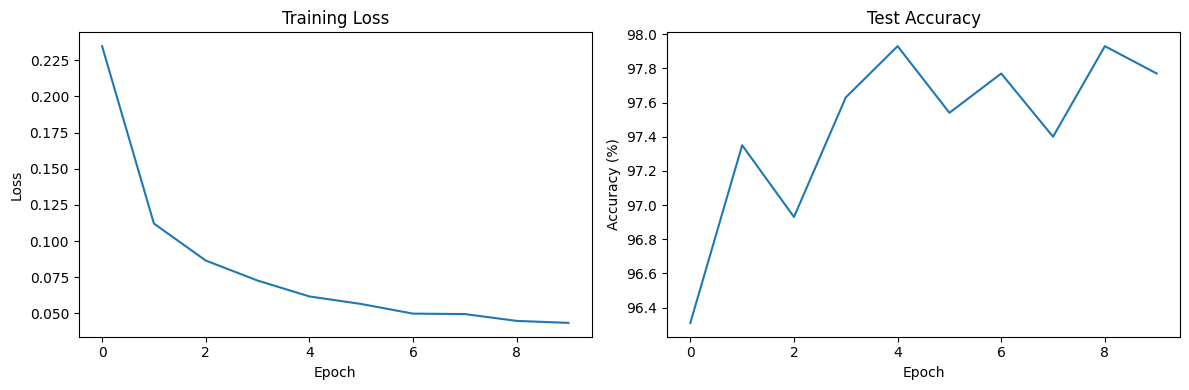

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

In [9]:
# Độ chính xác cuối cùng của tập test
final_accuracy = evaluate()
print(f'\n Last accuracy trên tập test: {final_accuracy:.2f}%')


 Last accuracy trên tập test: 97.77%
